In [1]:
!pip install tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl (332.0 MB)


In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [30]:
(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()

In [31]:
print(X_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


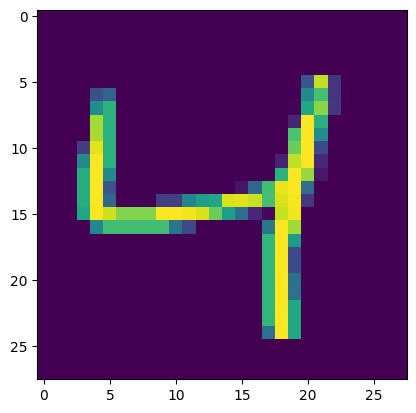

In [32]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

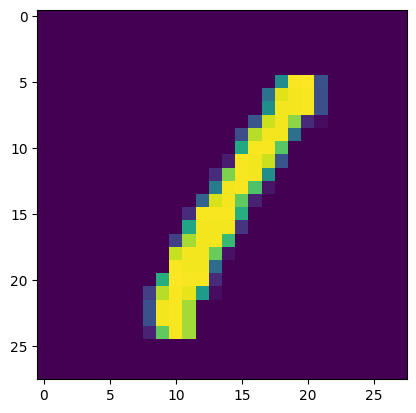

In [33]:
plt.imshow(X_train[3])

In [34]:
X_train = X_train/255
X_test = X_test/255

In [35]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [36]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [38]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9762 - loss: 0.0785 - val_accuracy: 0.9707 - val_loss: 0.0935
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9813 - loss: 0.0603 - val_accuracy: 0.9693 - val_loss: 0.1063
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9855 - loss: 0.0473 - val_accuracy: 0.9744 - val_loss: 0.0911
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9879 - loss: 0.0376 - val_accuracy: 0.9757 - val_loss: 0.0873
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9894 - loss: 0.0312 - val_accuracy: 0.9693 - val_loss: 0.1096
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9916 - loss: 0.0261 - val_accuracy: 0.9724 - val_loss: 0.1052
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9925 - loss: 0.0217 - val_accuracy: 0.9741 - val_loss: 0.1031
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9937 - loss

In [39]:
print(X_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


In [40]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [42]:
y_prob[1]

array([3.7805632e-21, 3.2704722e-08, 1.0000000e+00, 2.0434407e-13,
       8.6112783e-22, 1.3464609e-19, 1.6085814e-24, 1.5121793e-14,
       1.1909775e-15, 2.2043337e-21], dtype=float32)

In [43]:
y_pred = y_prob.argmax(axis=1)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9779

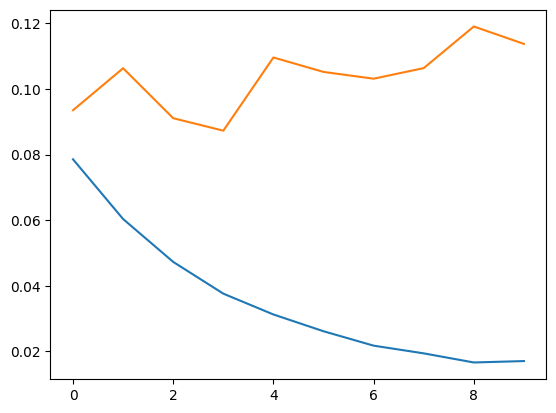

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

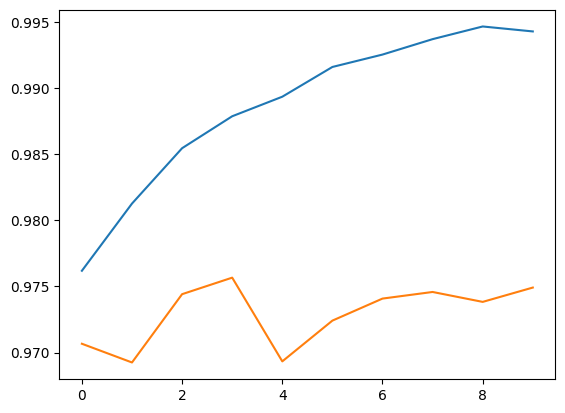

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])